<a href="https://colab.research.google.com/github/KhangRefi/Data-Science/blob/main/Import%26ExportData/Exercise_withWebAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import And Export Data Using a Web API

## List of libraries in use

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

## Function to get the trading information of a cryptocurrency from an market in a week
**Input**

*   symbol: name of the crytocurrency 
*   exchange: name of the market

**Output**

*   df: a pandas dataframe store the trading information






In [2]:
def get_historical_price(symbol, exchange):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    time = (pd.Timestamp.now() - pd.offsets.Day(7))
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(time).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

## Test the function with bitcoin on bitfinex

In [3]:
btc = get_historical_price('btc', 'bitfinex')
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-18 10:00:00,22284.0,22398.574299,22210.000000,22238.577933,332.938180,7.416164e+06
2022-07-18 11:00:00,22239.0,22363.000000,22135.000000,22193.000000,211.918131,4.717450e+06
2022-07-18 12:00:00,22194.0,22328.000000,21970.000000,22124.000000,224.710265,4.980393e+06
2022-07-18 13:00:00,22130.0,22309.000000,21900.000000,22273.000000,217.507052,4.800744e+06
2022-07-18 14:00:00,22278.0,22309.000000,22070.321869,22142.000000,244.972420,5.439665e+06


## Show analytical information of the bitcoin at that time

In [4]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,22752.476334,22895.700744,22614.712635,22751.609762,258.275573,5.888811e+06
std,572.760903,587.701745,564.335516,574.159283,261.219743,5.952592e+06
min,21496.000000,21684.000000,21405.000000,21498.000000,18.516364,4.232040e+05
25%,22284.000000,22394.000000,22161.000000,22286.000000,78.226706,1.832015e+06
50%,22736.000000,22853.000000,22646.000000,22736.000000,177.211717,4.108827e+06
75%,23208.000000,23326.000000,23064.681177,23209.000000,332.938180,7.591194e+06
max,24191.000000,24276.000000,24052.000000,24186.602504,1870.924320,4.247312e+07


## Plot the closing price of bitcoin 

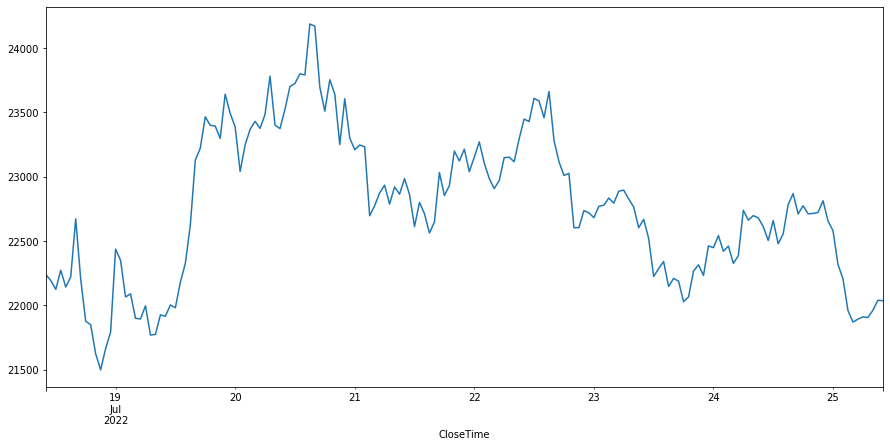

In [5]:
btc['ClosePrice'].plot(figsize=(15, 7))

## Test the function with ethereum on bitfinex

In [6]:
eth = get_historical_price('eth', 'bitfinex')
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-18 10:00:00,1478.000000,1488.400000,1470.7,1484.100000,2092.299830,3.096967e+06
2022-07-18 11:00:00,1484.600000,1510.000000,1471.6,1484.459470,4013.588245,5.988215e+06
2022-07-18 12:00:00,1484.357947,1497.900000,1465.3,1478.518744,4552.286380,6.760712e+06
2022-07-18 13:00:00,1478.822903,1487.200000,1455.3,1484.500000,3327.737172,4.900456e+06
2022-07-18 14:00:00,1485.000000,1492.875376,1471.5,1475.197233,2794.209347,4.138720e+06


## Show analytical information of the ehereum at that time

In [7]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,1549.296375,1563.935148,1535.863803,1549.668185,2109.922410,3.261048e+06
std,40.319017,41.358348,40.563256,39.961089,2176.027430,3.368994e+06
min,1469.353079,1479.000000,1450.400000,1469.100000,139.326495,2.226258e+05
25%,1520.839819,1533.800000,1509.500000,1521.300000,719.145236,1.109354e+06
50%,1548.762053,1565.228088,1535.100000,1548.600000,1609.670951,2.414573e+06
75%,1578.800000,1595.000000,1565.900000,1579.400000,2794.209347,4.329770e+06
max,1639.017343,1665.400000,1624.300000,1639.300000,16054.411936,2.502522e+07


## Plot the closing price of bitcoin 

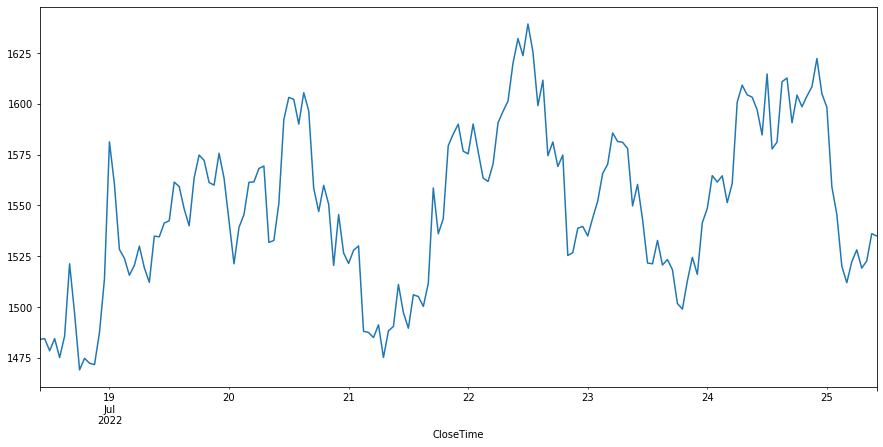

In [8]:
eth['ClosePrice'].plot(figsize=(15, 7))

## Export dataframe to Excel sheet

In [9]:
writer = pd.ExcelWriter('cryptos.xlsx')
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')
writer.save()